# Project: Investigate the movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.

> ## Questions
> * Which genres are most popular from year to year? 
> * What kinds of properties are associated with movies that have high revenues?
> * Which genres need high budget?
> * Which production companies have the highest revenue each year?
> * Is there a relation ship between the movie title and the popularity?
> * Which genres get the highest average number of votes?


> ### Needed Columns for Answering these Questions
> * genres
> * popularity
> * release_year
> * runtime
> * production_companies
> * release_date
> * vote_average
> * budget
> * revenue
> * director
> * cast
> * original_title

In [16]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import operator
from pprint import pprint

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [17]:
""" 
This Section contains Data Loading
""" 
df = pd.read_csv('tmdb-movies.csv') # Load data
df.head() # Show first rows of the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
print(df.info()) # Show data info
#df.duplicated() # Show duplicated rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
The data cleaning process contains three steps:
> 1. Removing Unwanted columns from the data set.
> 2. Removing any rows contain missing values.
> 3. Removing any duplicate rows.

In [19]:
""" 
This Section contains Data Cleaning Part
""" 
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace=True, axis=1) # remove the colums that aren't needed to answer our questions
df.dropna(inplace=True) # remove any rows with missing values 
df.drop_duplicates(inplace=True) # remove any duplicate rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


### Fuctions for Visualisation
there are two functions:
> 1. Function for splitting and counting the values of columns (Genres and cast)
> 2. Function for visualizing the relations between values of columns (Genres and cast) and other columns.


In [20]:
def split_count(col_name):
    """ 
    This function splits and counts the words frequency of genre or cast columns
    """
    col_labels = []
    values_no_duplicates = []
    word_counts = {}
    global new_word_counts
    new_word_counts = {}

    if col_name == 'genres' or col_name == 'cast' or col_name == 'production_companies':
        
        for s in df[col_name].str.split('|').values: # split the values of the column
            col_labels.append(s) # store the splitted values in a list

        for sublist in col_labels:
            for item in sublist:
                if item in word_counts and item in values_no_duplicates:
                    word_counts[item] += 1 # count how many times each genre is repeated in the dataset using dictionary
                else:
                    word_counts[item] = 1 # if the splitted genre wasn't counted before, add it with count 1
                    values_no_duplicates.append(item)


        sorted(word_counts.items(), key=lambda x: x[1], reverse=True) # sort the values in the dictionary
        for i in range(10):
            # add the to 10 values in the dictionary to a new dictionary
            new_word_counts[list(word_counts.keys())[i]] = list(word_counts.values())[i]
        
        # print the sorted top 10 values 
        pprint(sorted(new_word_counts.items(), key=lambda x: x[1], reverse=True))

        # draw the top 10 values in pie chart
        labels = new_word_counts.keys()
        x = new_word_counts.values()
        plt.pie(x, labels=labels)
        plt.title('The top 10 {}'.format(col_name))
        plt.show()
        
    else:
        print("please enter 'genre' or 'cast'")

In [21]:
def visualization (col_name):
    """ 
    This function visualiza the relation between cast or genre or production companies and other properties
    """
    max_budget = {}
    max_revenue = {}
    
    if col_name == 'genres':
        
        for word in new_word_counts.keys():
    
            # Select particular rows from the datafram where the given column contains the word from the list
            # then group them by release_year and show their other properties like (vote_count, popularity, vote_average, budget, revenue)
            # then visulaoze the relations between properties over years
            genre_yearly_vote_count = df[df[col_name].str.contains(word)].groupby('release_year')['vote_count'] # the relation between the genres and the vote_count
            plt.plot(genre_yearly_vote_count.mean())
            print('The Max Average vote of {} is {}\n'.format(word, genre_yearly_vote_count.mean().max())
                  +'The Min Average vote of {} is {}'.format(word, genre_yearly_vote_count.mean().min()))

            plt.xlabel('Release Year')
            plt.xticks([1965, 1975, 1985, 1995, 2005, 2015])
            plt.ylabel('Vote Count')
            plt.yticks([300, 600, 900, 1200, 1500])
            plt.title('Vote Count of {} genre over years'.format(word))
            plt.legend(loc=1, ncol=1, borderaxespad=1)
            plt.show()

            
            genre_popularoty_per_year = df[df[col_name].str.contains(word)].groupby('release_year')['popularity']  # the relation between the genres and the popularity
            plt.plot(genre_popularoty_per_year.mean())
            print('The Max popularity of {} is {}\n'.format(word, genre_popularoty_per_year.mean().max())
                  +'The Min popularity of {} is {}'.format(word, genre_popularoty_per_year.mean().min()))

            genre_yearly_vote_avg = df[df[col_name].str.contains(word)].groupby('release_year')['vote_average'] #  # the relation between the genres and the vote_average
            plt.plot(genre_yearly_vote_avg.mean())
            print('The Max Average vote of {} is {}\n'.format(word, genre_yearly_vote_avg.mean().max())
                  +'The Min Average vote of {} is {}'.format(word, genre_yearly_vote_avg.mean().min()))

            plt.xlabel('Release Year')
            plt.xticks([1965, 1975, 1985, 1995, 2005, 2015])
            plt.ylabel('popularity/ Vote Average')
            plt.yticks([1, 2, 15, 20, 25, 30])
            plt.title('popularity and Vote Average of {} genre over years'.format(word))
            plt.legend( loc=1, ncol=1, borderaxespad=1)
            plt.show()


            Movies_budget_per_year = df[df[col_name].str.contains(word)].groupby('release_year')['budget'] # the relation between the genres and the budget       
            df[df[col_name].str.contains(word)].groupby('release_year')['budget'].mean().plot()
            print('The Max Budget of {} Movies is {}\n'.format(word, Movies_budget_per_year.mean().max())
                  +'The Min Budget of {} Movies is {}'.format(word, Movies_budget_per_year.mean().min()))
            
            max_budget[word] = Movies_budget_per_year.mean().max()
            
            Movies_revenue_per_year = df[df[col_name].str.contains(word)].groupby('release_year')['revenue'] # the relation between the genres and the revenue
            df[df[col_name].str.contains(word)].groupby('release_year')['revenue'].mean().plot()
            print('The Max Revenue of {} Movies is {}\n'.format(word, Movies_revenue_per_year.mean().max())
                  +'The Min Revenue of {} Movies is {}'.format(word, Movies_revenue_per_year.mean().min()))
            
            max_revenue[word] = Movies_revenue_per_year.mean().max()
            
            plt.xlabel('Release Year')
            plt.xticks([1965, 1975, 1985, 1995, 2005, 2015])
            plt.ylabel('Budget/ Revenue')
            plt.title('Budget and Revenue of {} genre over years'.format(word))
            plt.legend( loc=1, ncol=1, borderaxespad=1)
            plt.show()
            
        print('Genres sorted by budget\n')
        pprint(sorted(max_budget.items(), key=lambda x: x[1], reverse=True))
        print('Genres sorted by revenue\n')
        pprint(sorted(max_revenue.items(), key=lambda x: x[1], reverse=True))
            
            
    elif col_name == 'cast':
        
        for word in new_word_counts.keys():
            
            movies_popularity_per_year = df[df[col_name].str.contains(word)].groupby('release_year')['popularity'] # the relation between the cast and the popularity
            plt.plot(movies_popularity_per_year.mean())
            print('The Max popularity of Actor "{}" movies over years is "{}"\n'.format(word, movies_popularity_per_year.mean().max())
                  +'The Min popularity of Actor "{}" movies over years is "{}"'.format(word, movies_popularity_per_year.mean().min()))

            plt.xlabel('Release Year')
            plt.xticks([1965, 1975, 1985, 1995, 2005, 2015])
            plt.ylabel('popularity')
            plt.yticks([5, 10, 15, 20, 25, 30, 35])
            plt.title('popularity of Actor "{}" movies over years'.format(word))
            plt.show()
            
    elif col_name == 'production_companies':
        
        for word in new_word_counts.keys():
            
            movies_revenue_per_year = df[df[col_name].str.contains(word)].groupby('release_year')['revenue'] # the relation between the production companies and the revenue
            plt.plot(movies_revenue_per_year.mean())
            plt.xlabel('Release Year')
            plt.xticks([1965, 1975, 1985, 1995, 2005, 2015])
            plt.ylabel('Revenue')
            plt.title('Revenue of "{}" company over years'.format(word))
            plt.show()
            
    else:
        print("please enter 'genres' or 'cast' or 'production_companies'")

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1
>### Which genres are most popular from year to year?
>### Which genres need high budget?

In [22]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


[('Drama', 4364),
 ('Thriller', 2746),
 ('Action', 2235),
 ('Adventure', 1384),
 ('Crime', 1299),
 ('Science Fiction', 1136),
 ('Family', 1095),
 ('Fantasy', 840),
 ('Animation', 617),
 ('Western', 160)]


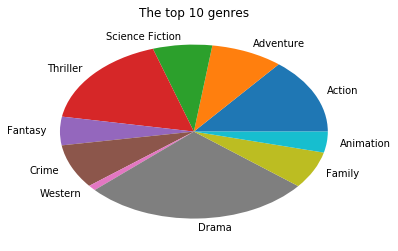

In [23]:
# split the genres in the genres column, count and visulaize their frequency of occurance 
split_count('genres')

The Max Average vote of Action is 855.8272727272728
The Min Average vote of Action is 17.785714285714285


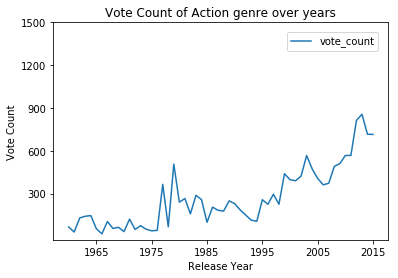

The Max popularity of Action is 2.3326469417475724
The Min popularity of Action is 0.24164972727272732
The Max Average vote of Action is 6.636363636363637
The Min Average vote of Action is 5.37


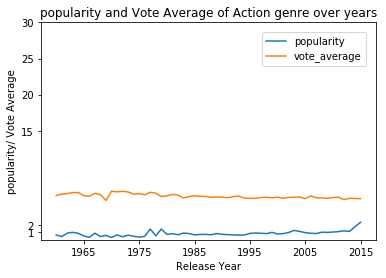

The Max Budget of Action Movies is 47919047.61904762
The Min Budget of Action Movies is 33333.333333333336
The Max Revenue of Action Movies is 128325029.36893204
The Min Revenue of Action Movies is 1857142.857142857


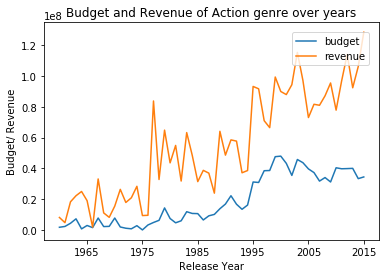

The Max Average vote of Adventure is 1340.4489795918366
The Min Average vote of Adventure is 26.636363636363637


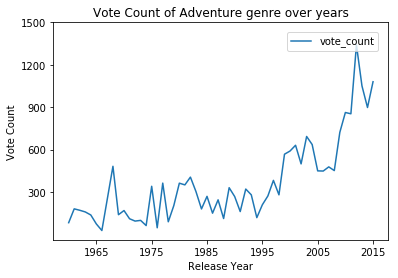

The Max popularity of Adventure is 3.4173727424242424
The Min popularity of Adventure is 0.29359263636363636
The Max Average vote of Adventure is 6.8
The Min Average vote of Adventure is 5.655102040816326


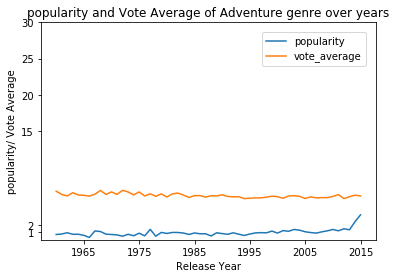

The Max Budget of Adventure Movies is 68048979.59183674
The Min Budget of Adventure Movies is 550000.0
The Max Revenue of Adventure Movies is 233915892.14285713
The Min Revenue of Adventure Movies is 981000.0


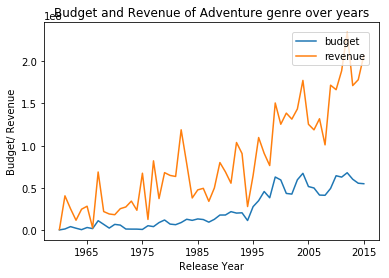

The Max Average vote of Science Fiction is 1145.7058823529412
The Min Average vote of Science Fiction is 10.0


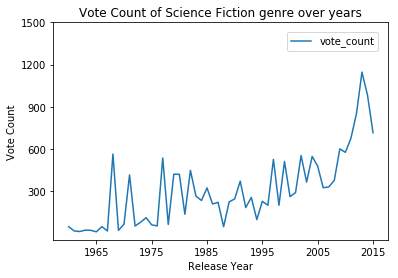

The Max popularity of Science Fiction is 2.486966578947369
The Min popularity of Science Fiction is 0.17254
The Max Average vote of Science Fiction is 6.766666666666667
The Min Average vote of Science Fiction is 4.533333333333334


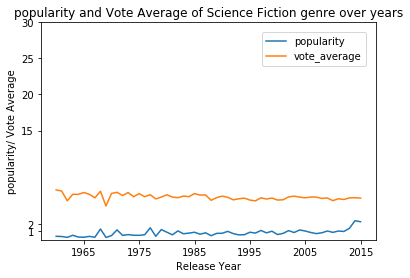

The Max Budget of Science Fiction Movies is 43692307.692307696
The Min Budget of Science Fiction Movies is 0.0
The Max Revenue of Science Fiction Movies is 138512954.39215687
The Min Revenue of Science Fiction Movies is 0.0


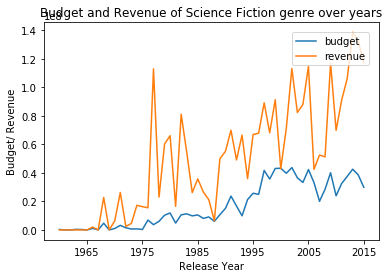

The Max Average vote of Thriller is 419.09638554216866
The Min Average vote of Thriller is 18.4


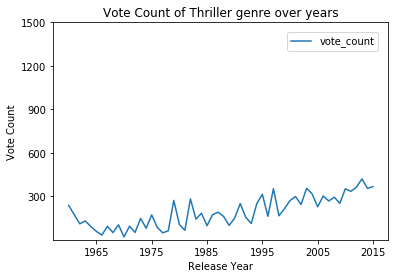

The Max popularity of Thriller is 1.4866085624999998
The Min popularity of Thriller is 0.2541036
The Max Average vote of Thriller is 6.816666666666667
The Min Average vote of Thriller is 5.333333333333333


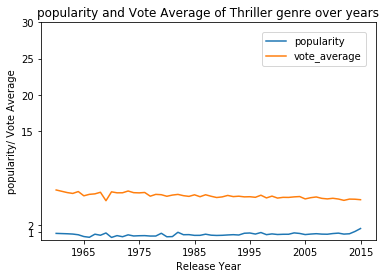

The Max Budget of Thriller Movies is 42885593.220338985
The Min Budget of Thriller Movies is 304491.3333333333
The Max Revenue of Thriller Movies is 93282382.20338982
The Min Revenue of Thriller Movies is 1625000.0


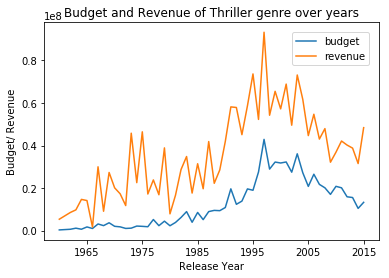

The Max Average vote of Fantasy is 1151.25
The Min Average vote of Fantasy is 12.0


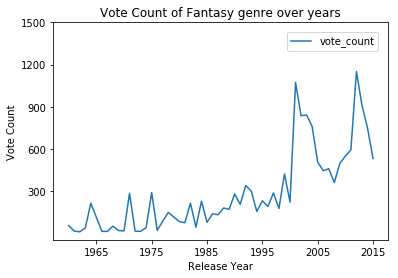

The Max popularity of Fantasy is 1.9511031666666663
The Min popularity of Fantasy is 0.113651
The Max Average vote of Fantasy is 6.9
The Min Average vote of Fantasy is 3.95


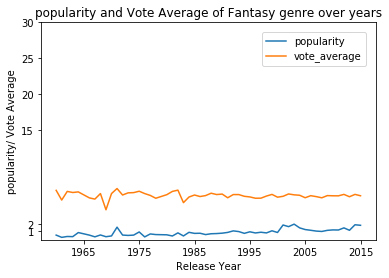

The Max Budget of Fantasy Movies is 64253750.0
The Min Budget of Fantasy Movies is 0.0
The Max Revenue of Fantasy Movies is 210164690.5882353
The Min Revenue of Fantasy Movies is 0.0


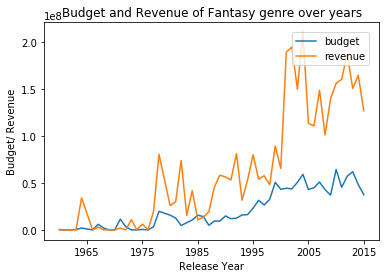

The Max Average vote of Crime is 686.8333333333334
The Min Average vote of Crime is 17.0


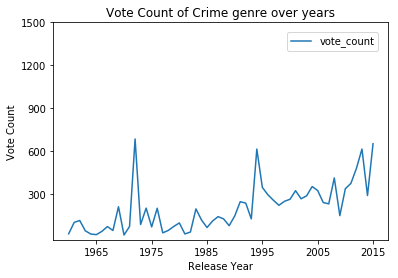

The Max popularity of Crime is 1.8458163404255319
The Min popularity of Crime is 0.22636283333333337
The Max Average vote of Crime is 7.005882352941177
The Min Average vote of Crime is 5.715254237288136


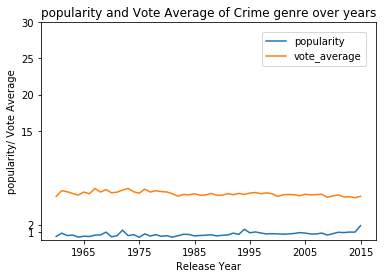

The Max Budget of Crime Movies is 38865384.615384616
The Min Budget of Crime Movies is 0.0
The Max Revenue of Crime Movies is 96134313.68085106
The Min Revenue of Crime Movies is 0.0


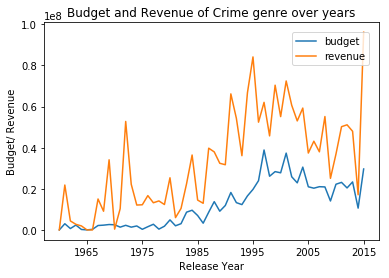

The Max Average vote of Western is 2509.0
The Min Average vote of Western is 10.0


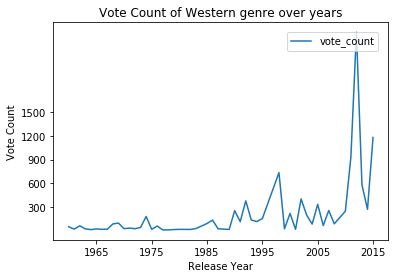

The Max popularity of Western is 3.178796166666667
The Min popularity of Western is 0.063184
The Max Average vote of Western is 7.4
The Min Average vote of Western is 5.2


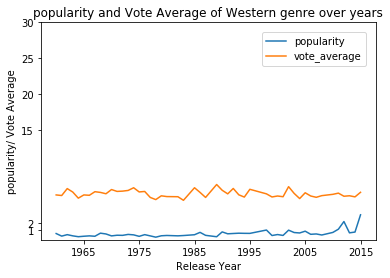

The Max Budget of Western Movies is 99333333.33333333
The Min Budget of Western Movies is 0.0
The Max Revenue of Western Movies is 250288523.0
The Min Revenue of Western Movies is 0.0


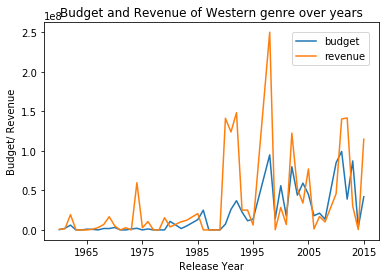

The Max Average vote of Drama is 331.1666666666667
The Min Average vote of Drama is 32.6


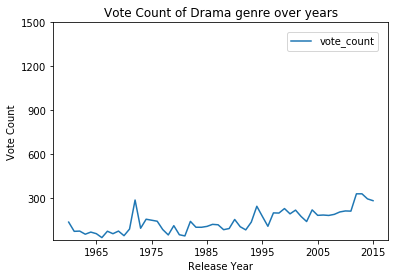

The Max popularity of Drama is 1.0263971330472097
The Min popularity of Drama is 0.3165878421052632
The Max Average vote of Drama is 6.816129032258065
The Min Average vote of Drama is 6.002970297029703


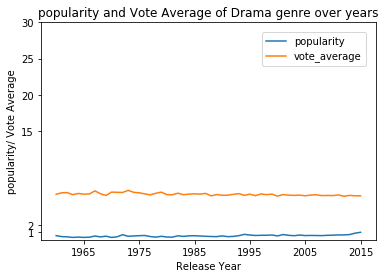

The Max Budget of Drama Movies is 25765909.09090909
The Min Budget of Drama Movies is 709900.0
The Max Revenue of Drama Movies is 53369963.44565217
The Min Revenue of Drama Movies is 3582445.933333333


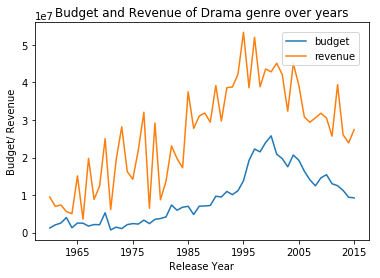

The Max Average vote of Family is 603.6875
The Min Average vote of Family is 13.0


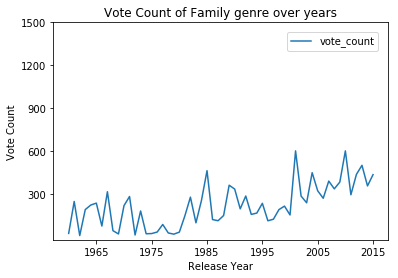

The Max popularity of Family is 1.5307224999999998
The Min popularity of Family is 0.17585666666666666
The Max Average vote of Family is 7.6
The Min Average vote of Family is 5.503225806451613


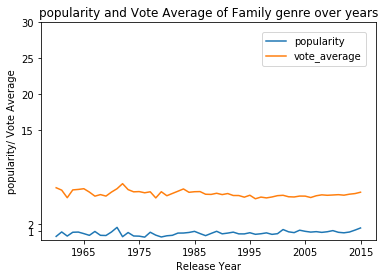

The Max Budget of Family Movies is 51214583.333333336
The Min Budget of Family Movies is 0.0
The Max Revenue of Family Movies is 164651816.91666666
The Min Revenue of Family Movies is 0.0


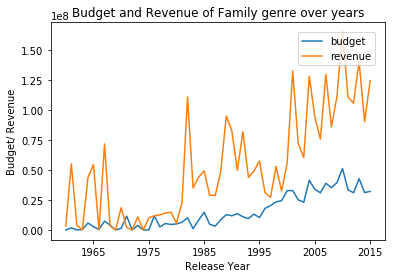

The Max Average vote of Animation is 928.0
The Min Average vote of Animation is 10.0


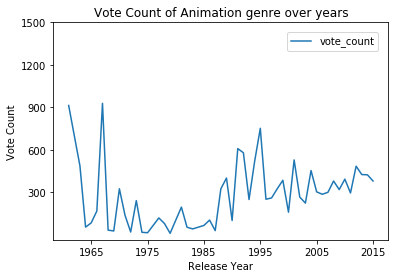

The Max popularity of Animation is 2.631987
The Min popularity of Animation is 0.032936
The Max Average vote of Animation is 7.6
The Min Average vote of Animation is 5.5


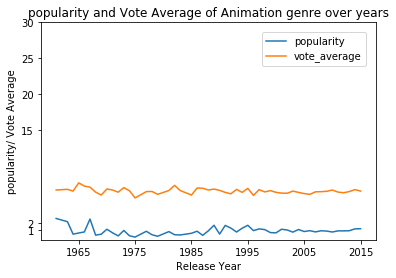

The Max Budget of Animation Movies is 40725000.083333336
The Min Budget of Animation Movies is 0.0
The Max Revenue of Animation Movies is 215880014.0
The Min Revenue of Animation Movies is 0.0


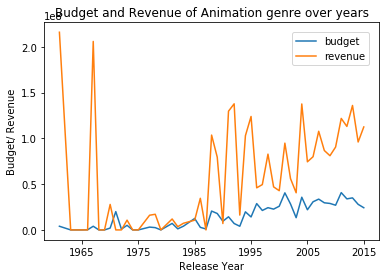

Genres sorted by budget

[('Western', 99333333.333333328),
 ('Adventure', 68048979.591836736),
 ('Fantasy', 64253750.0),
 ('Family', 51214583.333333336),
 ('Action', 47919047.619047619),
 ('Science Fiction', 43692307.692307696),
 ('Thriller', 42885593.220338985),
 ('Animation', 40725000.083333336),
 ('Crime', 38865384.615384616),
 ('Drama', 25765909.09090909)]
Genres sorted by revenue

[('Western', 250288523.0),
 ('Adventure', 233915892.14285713),
 ('Animation', 215880014.0),
 ('Fantasy', 210164690.58823529),
 ('Family', 164651816.91666666),
 ('Science Fiction', 138512954.39215687),
 ('Action', 128325029.36893204),
 ('Crime', 96134313.680851057),
 ('Thriller', 93282382.203389823),
 ('Drama', 53369963.445652172)]


In [24]:
# Visulaize the relation between each genre and other properties
visualization('genres')

### Research Question 2  
>* ### What are the most popular actors? 
>* ### what are the characteristics associated with the movies they participate in?

[('Charlize Theron', 31),
 ("Vincent D'Onofrio", 23),
 ('Tom Hardy', 19),
 ('Chris Pratt', 10),
 ('Nicholas Hoult', 10),
 ('Bryce Dallas Howard', 7),
 ('Irrfan Khan', 4),
 ('Nick Robinson', 2),
 ('Hugh Keays-Byrne', 2),
 ('Josh Helman', 1)]


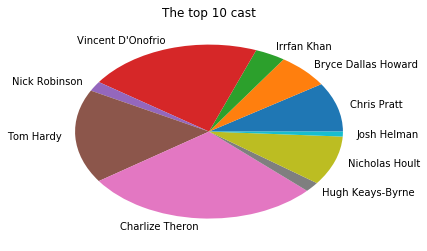

In [25]:
split_count('cast')

The Max popularity of Actor "Chris Pratt" movies over years is "32.985763"
The Min popularity of Actor "Chris Pratt" movies over years is "0.691716"


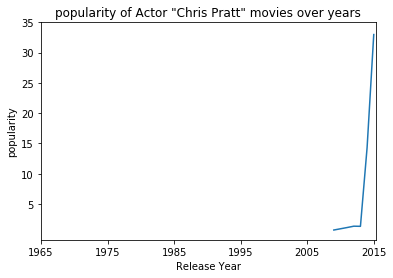

The Max popularity of Actor "Bryce Dallas Howard" movies over years is "32.985763"
The Min popularity of Actor "Bryce Dallas Howard" movies over years is "0.449064"


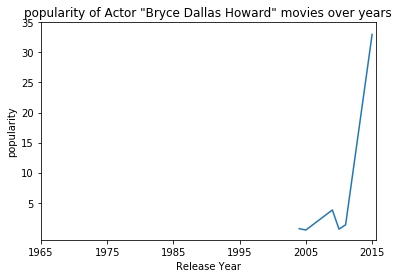

The Max popularity of Actor "Irrfan Khan" movies over years is "32.985763"
The Min popularity of Actor "Irrfan Khan" movies over years is "0.254596"


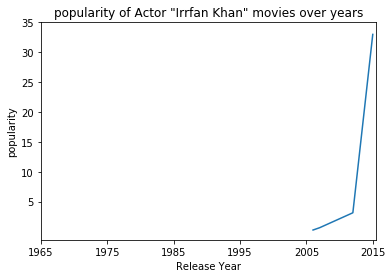

The Max popularity of Actor "Vincent D'Onofrio" movies over years is "32.985763"
The Min popularity of Actor "Vincent D'Onofrio" movies over years is "0.22270800000000002"


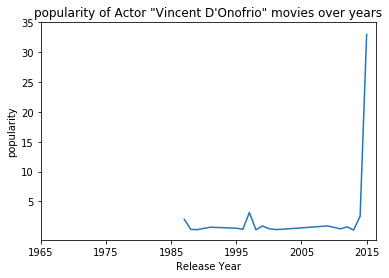

The Max popularity of Actor "Nick Robinson" movies over years is "32.985763"
The Min popularity of Actor "Nick Robinson" movies over years is "0.635352"


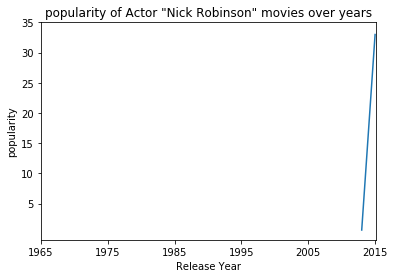

The Max popularity of Actor "Tom Hardy" movies over years is "10.4420765"
The Min popularity of Actor "Tom Hardy" movies over years is "0.15926400000000002"


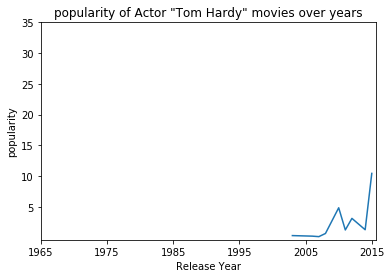

The Max popularity of Actor "Charlize Theron" movies over years is "14.931671"
The Min popularity of Actor "Charlize Theron" movies over years is "0.40328549999999996"


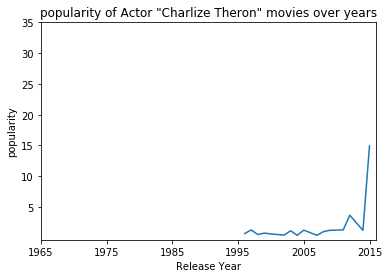

The Max popularity of Actor "Hugh Keays-Byrne" movies over years is "28.419936"
The Min popularity of Actor "Hugh Keays-Byrne" movies over years is "2.012021"


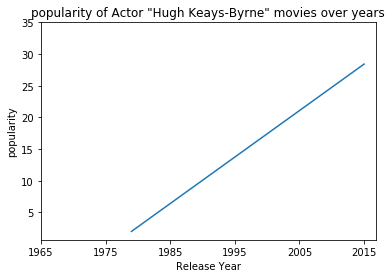

The Max popularity of Actor "Nicholas Hoult" movies over years is "8.065379"
The Min popularity of Actor "Nicholas Hoult" movies over years is "0.510296"


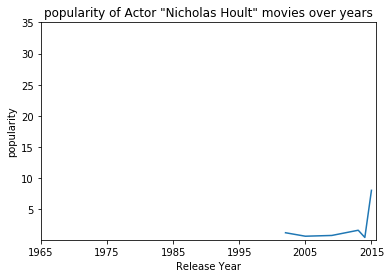

The Max popularity of Actor "Josh Helman" movies over years is "28.419936"
The Min popularity of Actor "Josh Helman" movies over years is "28.419936"


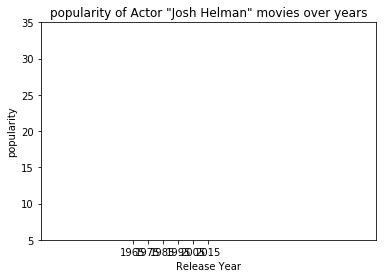

In [27]:
# visualize the popularity of each actor's movies
visualization('cast')

### Research Question 3  (What kinds of properties are associated with movies that have high revenues?)

In [28]:
mean = df.revenue.mean()
print(mean)
df.revenue.max()
df.revenue.where(df['revenue'] > mean).count()

44231208.8936


2041

In [29]:
def relation_with_revenue(col_name):
    """
    This function visualizes the relationship between revenue and the other properties
    """
    x = df['revenue']
    y = df[col_name]
    plt.scatter(x, y)
    plt.xlabel('Revenue')
    plt.ylabel(col_name)
    plt.show()

Text(0,0.5,'Revenue/ Budget')

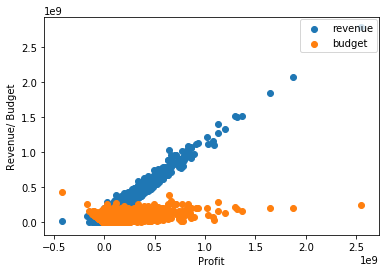

In [45]:
x = df['revenue']
y = df['budget']
z = []

# visualize the relationship between the profit, budget and revenue

for i in range(9772):
    # calculate the profit of each movie and store the output in a list called (z)
    z.append(list(df.revenue.values)[i] - list(df.budget.values)[i]) 
    
plt.scatter(z, x) # Profit and revenue
plt.scatter(z, y) # profit and budget
plt.legend( loc=1, ncol=1, borderaxespad=0.2)
plt.xlabel('Profit')
plt.ylabel('Revenue/ Budget')

Text(0,0.5,'Profit')

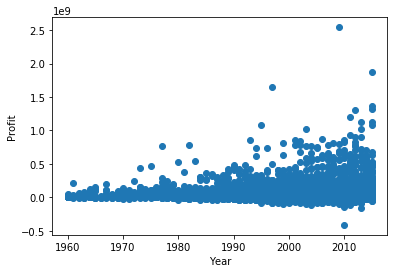

In [31]:
# The profit per year
x=df['release_year']
plt.scatter(x, z)
plt.legend( loc=1, ncol=1, borderaxespad=0.2)
plt.xlabel('Year')
plt.ylabel('Profit')

     The relationship between Revenue and popularity


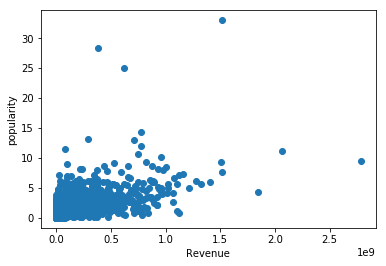

     The relationship between Revenue and budget


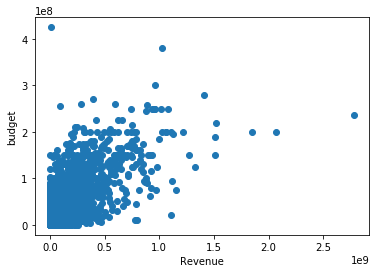

     The relationship between Revenue and vote_count


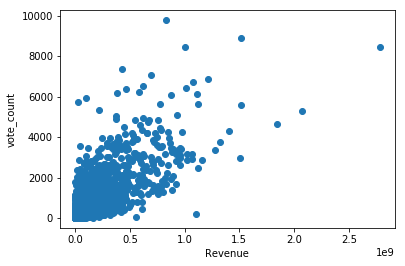

     The relationship between Revenue and vote_average


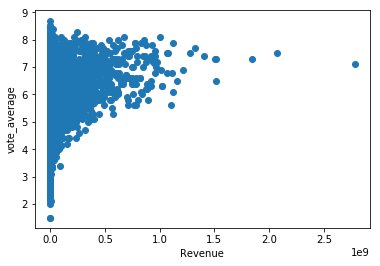

In [44]:
# visualize the relationship between the revenue and the other columns which their name are stored in the 'properties' list
properties = ['popularity', 'budget', 'vote_count', 'vote_average']
for col in properties:
    print("     The relationship between Revenue and {}".format(col))
    relation_with_revenue(col) 

> These plots show a week correlation between the revenue and the other Properties

### Research Question 4  (Which production companies have the highest revenue each year?)

[('Village Roadshow Pictures', 88),
 ('Amblin Entertainment', 65),
 ('Summit Entertainment', 62),
 ('Legendary Pictures', 39),
 ('Universal Studios', 19),
 ('Dentsu', 13),
 ('Mandeville Films', 11),
 ('Kennedy Miller Productions', 10),
 ('Red Wagon Entertainment', 8),
 ('Fuji Television Network', 3)]


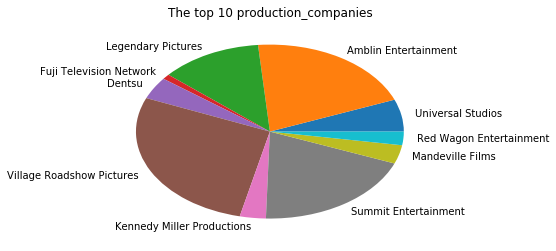

In [33]:
# count the movies produced by each production company
# then select and visulaize the top 10 
split_count('production_companies')

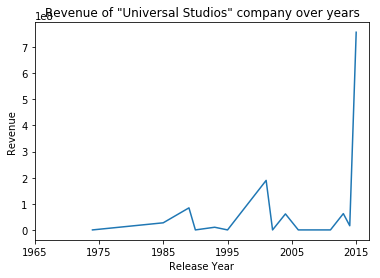

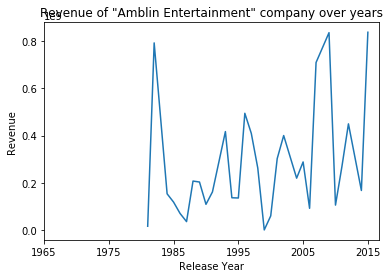

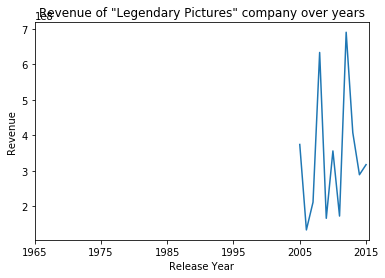

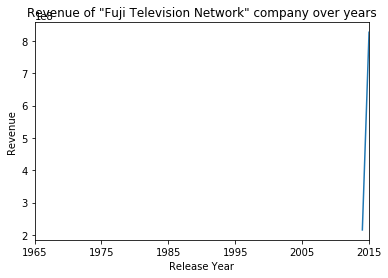

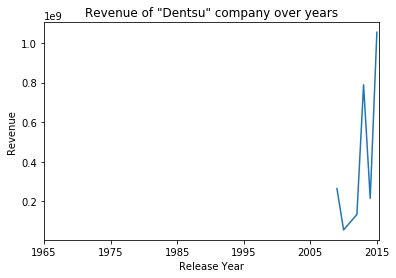

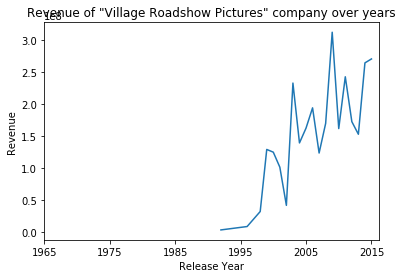

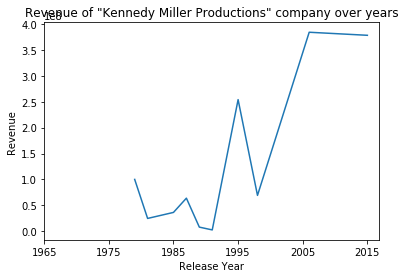

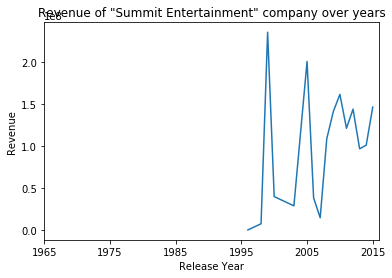

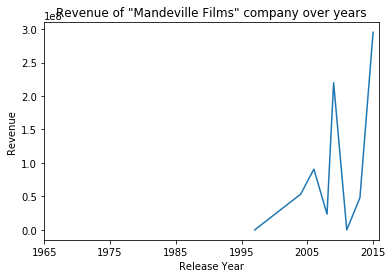

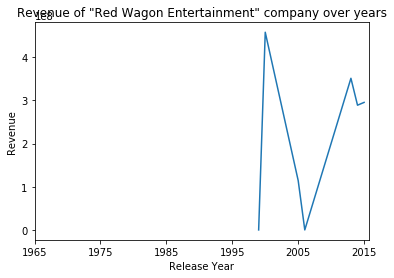

In [34]:
# Visualize the revenue of each company over years
visualization('production_companies')

### The top 10 companies according their number of movies are:
> - ('Village Roadshow Pictures', 88)
> - ('Amblin Entertainment', 65)
> - ('Summit Entertainment', 62)
> - ('Legendary Pictures', 39)
> - ('Universal Studios', 19)
> - ('Dentsu', 13)
> - ('Mandeville Films', 11)
> - ('Kennedy Miller Productions', 10)
> - ('Red Wagon Entertainment', 8)
> - ('Fuji Television Network', 3)

### - **The top 3 companies which acieve high revenue each year are:**
> - Universal Studios
> - Amblin Entertainment
> - Legendary Picture -> appeared after the other two companies nealy 25 years.

### - **The genres which make the highest revenue during the last years are Fantasy and Adventure.**

<a id='conclusions'></a>
# Overall Conclusions

- 
> -**These conclusions are limited by the used part of the dataset**
- 
> -**As a future work we could explore the director and release_date columns and find out their relationships with other properties specially the revenue**

    - Max Popularity is 32.985763
    - Min Popularity is 0.000188
    - Mean Popularity is 0.694721
    - 
    - Max Budget is 4.250000e+08
    - Mean Budget is 1.617967e+07
    - 
    - Max Revenue is 2.781506e+09
    - Mean Revenue is 4.423121e+07
    - 
    - Max Vote count is 9767.000000
    - Min Vote count is 10.000000
    - Mean Vote count is 239.312014
    - 
    - Max Avg Vote is 8.700000
    - Min Avg Vote is 1.500000
    - Mean Avg Vote is 5.963528


### - **The top 10 genres in the dataset movies are ('Drama', 'Thriller', 'Action', 'Adventure', 'Crime', 'Science Fiction','Family','Fantasy','Animation','Western') in order.**

Genres sorted by budget

- **[('Western', 99333333.333333328)**
- **('Adventure', 68048979.591836736)**
- **('Fantasy', 64253750.0)**
- **('Family', 51214583.333333336)**
- **('Action', 47919047.619047619)**
- **('Science Fiction', 43692307.692307696)**
- **('Thriller', 42885593.220338985)**
- **('Animation', 40725000.083333336)**
- **('Crime', 38865384.615384616)**
- **('Drama', 25765909.09090909)]**


Genres sorted by revenue

- **[('Western', 250288523.0)**
- **('Adventure', 233915892.14285713)**
- **('Animation', 215880014.0)**
- **('Fantasy', 210164690.58823529)**
- **('Family', 164651816.91666666)**
- **('Science Fiction', 138512954.39215687)**
- **('Action', 128325029.36893204)**
- **('Crime', 96134313.680851057)**
- **('Thriller', 93282382.203389823)**
- **('Drama', 53369963.445652172)]**

Action

- **The Max Average vote of Action is 855.8272727272728**
- **The Min Average vote of Action is 17.785714285714285**
- 
- **The Max popularity of Action is 2.3326469417475724**
- **The Min popularity of Action is 0.24164972727272732**
- 
- **The Max Average vote of Action is 6.636363636363637**
- **The Min Average vote of Action is 5.37**
- 
- **The Max Budget of Action Movies is 47919047.61904762**
- **The Min Budget of Action Movies is 33333.333333333336**

- **The Max Revenue of Action Movies is 128325029.36893204**
- **The Min Revenue of Action Movies is 1857142.857142857**
- 
- **The attention to Action movies genre increases over years as it shown by:**
* the increasing of vote count per year.
* the icreasing of revenue per year.

Adventure

- **The Max Average vote of Adventure is 1340.4489795918366**
- **The Min Average vote of Adventure is 26.636363636363637**
- 
- **The Max popularity of Adventure is 3.4173727424242424**
- **The Min popularity of Adventure is 0.29359263636363636**
- 
- **The Max Average vote of Adventure is 6.8**
- **The Min Average vote of Adventure is 5.655102040816326**
- 
- **The Max Budget of Adventure Movies is 68048979.59183674**
- **The Min Budget of Adventure Movies is 550000.0**
- 
- **The Max Revenue of Adventure Movies is 233915892.14285713**
- **The Min Revenue of Adventure Movies is 981000.0**
- 
- **The attention to Adventure movies genre increases over years as it shown by:**
* the increasing of vote count per year.
* the icreasing of revenue per year.

Science Fiction

- **The Max Average vote of Science Fiction is 1145.7058823529412**
- **The Min Average vote of Science Fiction is 10.0**
- 
- **The Max popularity of Science Fiction is 2.486966578947369**
- **The Min popularity of Science Fiction is 0.17254**
- 
- **The Max Average vote of Science Fiction is 6.766666666666667**
- **The Min Average vote of Science Fiction is 4.533333333333334**
- 
- **The Max Budget of Science Fiction Movies is 43692307.692307696**
- **The Min Budget of Science Fiction Movies is 0.0**
- 
- **The Max Revenue of Science Fiction Movies is 138512954.39215687**
- **The Min Revenue of Science Fiction Movies is 0.0**
- 
- **The attention to Science Fiction movies genre increases over years as it shown by:**
* the increasing of vote count per year.
* the icreasing of revenue per year.

Thriller

- **The Max Average vote of Thriller is 419.09638554216866**
- **The Min Average vote of Thriller is 18.4**
- 
- **The Max popularity of Thriller is 1.4866085624999998**
- **The Min popularity of Thriller is 0.2541036**
- 
- **The Max Average vote of Thriller is 6.816666666666667**
- **The Min Average vote of Thriller is 5.333333333333333**
- 
- **The Max Budget of Thriller Movies is 42885593.220338985**
- **The Min Budget of Thriller Movies is 304491.3333333333**
- 
- **The Max Revenue of Thriller Movies is 93282382.20338982**
- **The Min Revenue of Thriller Movies is 1625000.0**
- 

Fantasy

- **The Max Average vote of Fantasy is 1151.25**
- **The Min Average vote of Fantasy is 12.0**
- 
- **The Max popularity of Fantasy is 1.9511031666666663**
- **The Min popularity of Fantasy is 0.113651**
- 
- **The Max Average vote of Fantasy is 6.9**
- **The Min Average vote of Fantasy is 3.95**
- 
- **The Max Budget of Fantasy Movies is 64253750.0**
- **The Min Budget of Fantasy Movies is 0.0**
- 
- **The Max Revenue of Fantasy Movies is 210164690.5882353**
- **The Min Revenue of Fantasy Movies is 0.0**


Crime 

- **The Max Average vote of Crime is 686.8333333333334**
- **The Min Average vote of Crime is 17.0**
- 
- **The Max popularity of Crime is 1.8458163404255319**
- **The Min popularity of Crime is 0.22636283333333337**
- 
- **The Max Average vote of Crime is 7.005882352941177**
- **The Min Average vote of Crime is 5.715254237288136**
- 
- **The Max Budget of Crime Movies is 38865384.615384616**
- **The Min Budget of Crime Movies is 0.0**
- 
- **The Max Revenue of Crime Movies is 96134313.68085106**
- **The Min Revenue of Crime Movies is 0.0**


Western

- **The Max Average vote of Western is 2509.0**
- **The Min Average vote of Western is 10.0**
- 
- **The Max popularity of Western is 3.178796166666667**
- **The Min popularity of Western is 0.063184**
- 
- **The Max Average vote of Western is 7.4**
- **The Min Average vote of Western is 5.2**
- 
- **The Max Budget of Western Movies is 99333333.33333333**
- **The Min Budget of Western Movies is 0.0**
- 
- **The Max Revenue of Western Movies is 250288523.0**
- **The Min Revenue of Western Movies is 0.0**


Drama

- **The Max Average vote of Drama is 331.1666666666667** 
- **The Min Average vote of Drama is 32.6**
- 
- **The Max popularity of Drama is 1.0263971330472097**
- **The Min popularity of Drama is 0.3165878421052632**
- 
- **The Max Average vote of Drama is 6.816129032258065**
- **The Min Average vote of Drama is 6.002970297029703**
- 
- **The Max Budget of Drama Movies is 25765909.09090909**
- **The Min Budget of Drama Movies is 709900.0**
- 
- **The Max Revenue of Drama Movies is 53369963.44565217**
- **The Min Revenue of Drama Movies is 3582445.933333333**


Family

- **The Max Average vote of Family is 603.6875**
- **The Min Average vote of Family is 13.0**
- 
- **The Max popularity of Family is 1.5307224999999998**
- **The Min popularity of Family is 0.17585666666666666**
- 
- **The Max Average vote of Family is 7.6**
- **The Min Average vote of Family is 5.503225806451613**
- 
- **The Max Budget of Family Movies is 51214583.333333336**
- **The Min Budget of Family Movies is 0.0**
- 
- **The Max Revenue of Family Movies is 164651816.91666666**
- **The Min Revenue of Family Movies is 0.0**


Animation

- **The Max Average vote of Animation is 928.0**
- **The Min Average vote of Animation is 10.0**
- 
- **The Max popularity of Animation is 2.631987**
- **The Min popularity of Animation is 0.032936**
- 
- **The Max Average vote of Animation is 7.6**
- **The Min Average vote of Animation is 5.5**
- 
- **The Max Budget of Animation Movies is 40725000.083333336**
- **The Min Budget of Animation Movies is 0.0**
- 
- **The Max Revenue of Animation Movies is 215880014.0**
- **The Min Revenue of Animation Movies is 0.0**

.

- ** The top 10 Actors according to the frequency of appearance the movies of this dataset are:**

> - ('Charlize Theron', 31) 
> - ("Vincent D'Onofrio", 23)
> - ('Tom Hardy', 19)
> - ('Chris Pratt', 10)
> - ('Nicholas Hoult', 10)
> - ('Bryce Dallas Howard', 7)
> - ('Irrfan Khan', 4)
> - ('Nick Robinson', 2)
> - ('Hugh Keays-Byrne', 2)
> - ('Josh Helman', 1)


- The popularity of Irrfan Khan movies and Vincent D'Onofrio movies increased a lot through 2015
- The popularity of Nick Robinson movies increased rapidly through three years until 2015
- Hugh Keays-Byrne's movies are linearly increase in popularity over years from 1978 to 2015.
- 
### - **There is no relationship between the budget of the movies and their revenue.**

### The top 10 companies according their number of movies are:
> - ('Village Roadshow Pictures', 88)
> - ('Amblin Entertainment', 65)
> - ('Summit Entertainment', 62)
> - ('Legendary Pictures', 39)
> - ('Universal Studios', 19)
> - ('Dentsu', 13)
> - ('Mandeville Films', 11)
> - ('Kennedy Miller Productions', 10)
> - ('Red Wagon Entertainment', 8)
> - ('Fuji Television Network', 3)

### - **The top 3 companies which acieve high revenue each year are:**
> - Universal Studios
> - Amblin Entertainment
> - Legendary Picture -> appeared after the other two companies nealy 25 years.

### - **The genres which make the highest revenue during the last years are Fantasy and Adventure.**